In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/pre-processed.csv')
df.head()

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...


In [3]:
df = df.drop(columns=['index'])
df

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...
...,...,...
7195,true,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...


In [4]:
df['label'] = df.apply(lambda row: 1 if row.label == 'fake' else 0, axis=1)
df_true = df.loc[df['label'] == 0]
df_fake = df.loc[df['label'] == 1]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df_countvectorizer = vectorizer.fit_transform(df['preprocessed_news'])
df_countvectorizer

<7200x79541 sparse matrix of type '<class 'numpy.int64'>'
	with 1705040 stored elements in Compressed Sparse Row format>

In [6]:
df_countvectorizer.shape

(7200, 79541)

In [7]:
df.drop([ 'preprocessed_news'],axis=1, inplace=True)
df

,label
0,1
1,1
2,1
3,1
4,1
...,...
7195,0
7196,0
7197,0
7198,0


In [8]:
noticias = pd.DataFrame(df_countvectorizer.toarray())

In [9]:
df = pd.concat([df, noticias], axis = 1)
df

,label,0,1,2,3,4,5,6,7,8,...,79531,79532,79533,79534,79535,79536,79537,79538,79539,79540
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.drop(['label'], axis = 1)
Y = df['label']


In [11]:
X.shape

(7200, 79541)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [13]:
# 4060 -> 400 -> 400 -> 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 600, activation='relu', input_shape=(79541,)))
classifier.add(tf.keras.layers.Dense(units = 600, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               47725200  
                                                                 
 dense_1 (Dense)             (None, 600)               360600    
                                                                 
 dense_2 (Dense)             (None, 1)                 601       
                                                                 
Total params: 48,086,401
Trainable params: 48,086,401
Non-trainable params: 0
_________________________________________________________________


In [14]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [15]:
epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
180/180 [==============================] - 72s 393ms/step - loss: 0.2146 - accuracy: 0.9019
Epoch 2/10
180/180 [==============================] - 71s 391ms/step - loss: 0.0255 - accuracy: 0.9939
Epoch 3/10
180/180 [==============================] - 73s 405ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 4/10
180/180 [==============================] - 70s 388ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 5/10
180/180 [==============================] - 67s 373ms/step - loss: 4.8595e-05 - accuracy: 1.0000
Epoch 6/10
180/180 [==============================] - 63s 351ms/step - loss: 1.8699e-05 - accuracy: 1.0000
Epoch 7/10
180/180 [==============================] - 62s 345ms/step - loss: 8.9437e-06 - accuracy: 1.0000
Epoch 8/10
180/180 [==============================] - 65s 361ms/step - loss: 5.0142e-06 - accuracy: 1.0000
Epoch 9/10
180/180 [==============================] - 66s 365ms/step - loss: 3.1454e-06 - accuracy: 1.0000
Epoch 10/10
180/180 [==============================] 

In [24]:
y_pred = classifier.predict(X_test)

45/45 [==============================] - 2s 35ms/step


180/180 [==============================] - 7s 36ms/step


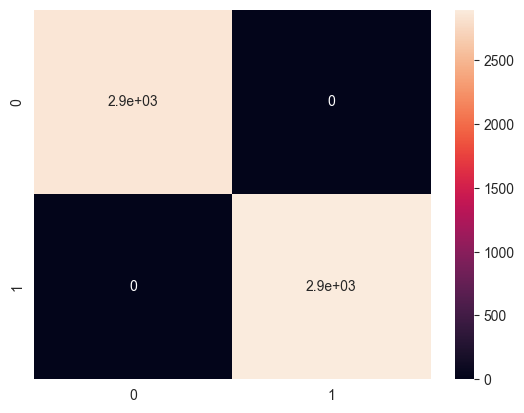

In [22]:
from sklearn.metrics import confusion_matrix
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

ValueError: Classification metrics can't handle a mix of binary and continuous targets

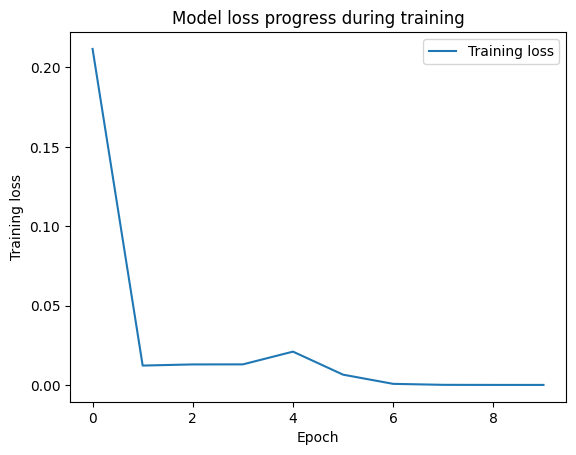

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

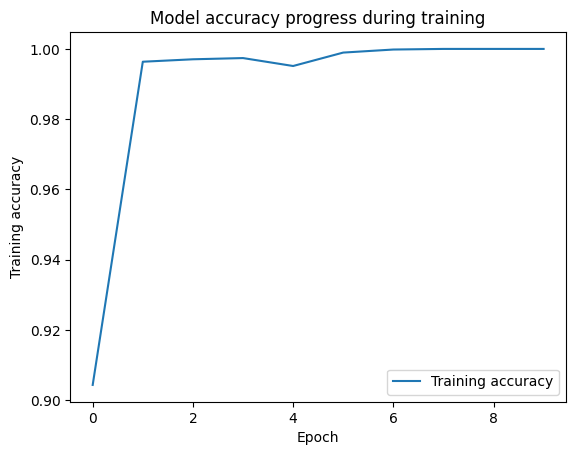

In [34]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])